In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import tensorflow as tf
import keras

from S1_generator.S1_event_generator import S1_event
from Threshold_cross102 import peak_threshold_finder2
from Peak_properties_analyzer import peak_properties

In [5]:
model = keras.models.load_model('/Users/francescostraniero/Documents/Pembroke_4th_year/MPhys_Proj/CNN_model.keras')

In [6]:
a,n,p = S1_event(13)
test = np.ndarray(shape=(1,5000,1))
test[0,:,0]=a
prediction = model.predict(test)

fff2 = np.arange(0,len(a),1)

        
positions = fff2[(prediction[0,:,0]>0.9)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


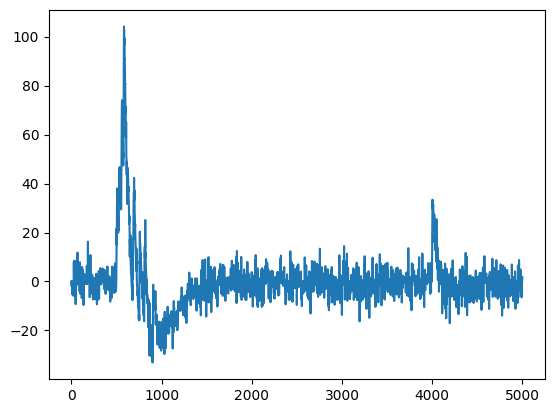

In [7]:
x = np.arange(0,len(a),1)
plt.plot(x,a)

In [18]:
peak_properties(positions,a,'CNN')

,Position,Rise time,Fall time,total time,Pulse magnitude,Integrated area above,Integrated area below
0,500.0,20.0,85.0,105.0,210.655617,9662.614831,-2525.950728
1,515.0,5.0,85.0,90.0,210.655617,9662.614831,-2525.950728
2,710.0,33.0,60.0,93.0,204.703036,8626.267862,-8218.819938
3,734.0,9.0,60.0,69.0,204.703036,8329.510786,-8218.819938
4,1003.0,9.0,44.0,53.0,52.796268,1290.213058,-2500.758030
5,1167.0,8.0,56.0,64.0,112.446462,3533.846869,-7056.000934
6,1544.0,7.0,133.0,140.0,108.631232,6327.901004,-535.353802
7,1620.0,7.0,57.0,64.0,89.086935,2778.349045,-535.353802
8,1721.0,10.0,47.0,57.0,79.043196,2081.170406,-2894.112487
9,1885.0,6.0,56.0,62.0,99.659251,2932.446294,-1716.426320


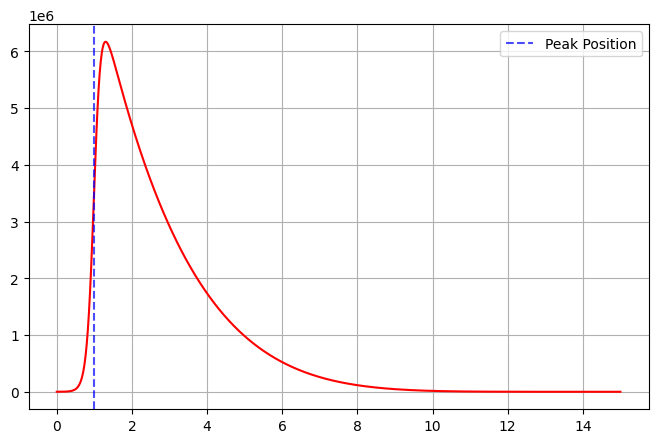

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the asymmetric Bragg peak function
def asymmetric_bragg_peak(x, A=1.0, B=0.002, m=6, x_p=14, C=1, D=10.5):
    """ Function to model an asymmetric Bragg peak """
    return A * x**m * np.exp(-B * x) / (1 + C * np.exp(-D * (x_p - x))) 

# Generate depth values
x = np.linspace(0, 15, 1000)  # Depth in arbitrary units
y = asymmetric_bragg_peak(15-x+0.001)

# Plot the Bragg peak
plt.figure(figsize=(8,5))
plt.plot(x, y, color="red")
plt.axvline(x=15-14, linestyle="--", color="blue", alpha=0.7, label="Peak Position")


plt.legend()
plt.grid(True)
plt.show()



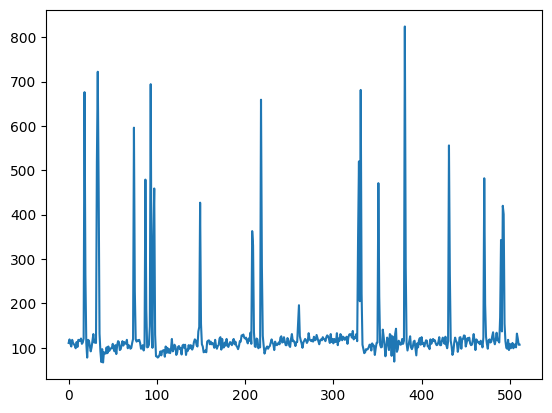

In [27]:
df = pd.read_table('/Users/francescostraniero/Downloads/LightLeak_001.dat', sep='\s+', header=None)

y = df.iloc[5]
x = np.arange(0,len(y),1)
plt.plot(x,-y)

In [3]:
found = []
for i in range(547):
    y = df.iloc[i]
    n,p = peak_threshold_finder2(y)
    if n != 0:
        found.append([i,p])



In [17]:
test= np.ndarray(shape=(1,512,1))
test[0,:,0]= y
prediction = model.predict(test)

fff2 = np.arange(0,len(y),1)

        
positions = fff2[(prediction[0,:,0]>0.4)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [29]:
test= np.ndarray(shape=(1,512,1))
found2 = []
for i in range(355):
    y = df.iloc[i]
    test[0,:,0]= y
    prediction = model.predict(test, verbose=0)

    fff2 = np.arange(0,len(y),1)
    positions = fff2[(prediction[0,:,0]>0.4)]

    if positions.size !=0:
        found2.append([i,positions])